<a href="https://colab.research.google.com/github/nestormontano/PrDS_2023_01_WIDS_Prediccion_Energia/blob/main/eda_py_Grupo3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
 !pip install skimpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.0/116.0 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 38.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.3/38.3 MB 15.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.0/78.0 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 51.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 346.6/346.6 kB 30.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 51.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.0/51.0 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 59.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 866.1/866.1 kB 50.2 MB/s eta 0:00:00
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.5.0
    Uninstall

In [1]:
import numpy as np
import pandas as pd

In [2]:
import skimpy

## Premilinares
### Importacion

In [4]:
data= pd.read_csv('/content/Churn_Modelling.csv')

In [5]:
data.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


### Corregir datos

In [7]:
data.apply( lambda x: 'si' if x['HasCrCard'] == 0 else 'no', axis=1)

0       no
1       si
2       no
3       si
4       no
        ..
9995    no
9996    no
9997    si
9998    no
9999    no
Length: 10000, dtype: object

In [8]:
data['HasCrCard']= data.apply( lambda x: 'si' if x['HasCrCard'] == 0 else 'no', axis=1)

In [9]:
data['IsActiveMember']= data.apply( lambda x: 'si' if x['IsActiveMember'] == 0 else 'no', axis=1)

In [10]:
del data['RowNumber']

In [11]:
data['CustomerId']= data['CustomerId'].to_string()

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  object 
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  object 
 10  IsActiveMember   10000 non-null  object 
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 1015.8+ KB


In [13]:
skimpy.skim(data)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 10000  │ │ string      │ 6     │                                                          │
│ │ Number of columns │ 13     │ │ int64       │ 5     │                                                          │
│ └───────────────────┴────────┘ │ float64     │ 2     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name        ┃ NA  ┃ NA %  ┃ mean    ┃ sd     ┃ p0   ┃ p25    ┃ p50     ┃ p75     ┃ p100    ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━┩  │
│ │ CreditScore        │   0 │     0 │     650 │     97 │  350 │    580 │     650 │     720 │     850 │  ▂▅▇▆▃ │  │
│ │ Age                │   0 │     0 │      39 │     10 │   18 │     32 │      37 │      44 │      92 │  ▃▇▃▁  │  │
│ │ Tenure             │   0 │     0 │       5 │    2.9 │    0 │      3 │       5 │       7 │      10 │ ▆▇▃▇▇▆ │  │
│ │ Balance            │   0 │     0 │   76000 │  62000 │    0 │      0 │   97000 │  130000 │  250000 │ ▇▂▆▅▁  │  │
│ │ NumOfProducts      │   0 │     0 │     1.5 │   0.58 │    1 │      1 │       1 │       2 │       4 │  ▇ ▇   │  │
│ │ EstimatedSalary    │   0 │     0 │  100000 │  58000 │   12 │  51000 │  100000 │  150000 │  200000 │ ▇▇▇▇▇▇ │  │
│ │ Exited             │   0 │     0 │     0.2 │    0.4 │    0 │      0 │       0 │       0 │       1 │ ▇    ▂ │  │
│ └────────────────────┴─────┴───────┴─────────┴────────┴──────┴────────┴─────────┴─────────┴─────────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                   ┃ NA     ┃ NA %       ┃ words per row               ┃ total words            ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ CustomerId                    │      0 │          0 │                       41000 │              411110000 │  │
│ │ Surname                       │      0 │          0 │                           1 │                  10055 │  │
│ │ Geography                     │      0 │          0 │                           1 │                  10000 │  │
│ │ Gender                        │      0 │          0 │                           1 │                  10000 │  │
│ │ HasCrCard                     │      0 │          0 │                           1 │                  10000 │  │
│ │ IsActiveMember                │      0 │          0 │                           1 │                  10000 │  │
│ └───────────────────────────────┴────────┴────────────┴─────────────────────────────┴────────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

# **EDA BiVariado** --- Grupo 3

In [14]:
data.shape

(10000, 13)

In [15]:
duplicate_rows_data = data[data.duplicated()]
print("number of duplicate rows: ", duplicate_rows_data.shape)

number of duplicate rows:  (0, 13)


In [19]:
data.count()

CustomerId         10000
Surname            10000
CreditScore        10000
Geography          10000
Gender             10000
Age                10000
Tenure             10000
Balance            10000
NumOfProducts      10000
HasCrCard          10000
IsActiveMember     10000
EstimatedSalary    10000
Exited             10000
dtype: int64

In [20]:
print(data.isnull().sum())

CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


In [22]:
data = data.dropna()
data.count()

CustomerId         10000
Surname            10000
CreditScore        10000
Geography          10000
Gender             10000
Age                10000
Tenure             10000
Balance            10000
NumOfProducts      10000
HasCrCard          10000
IsActiveMember     10000
EstimatedSalary    10000
Exited             10000
dtype: int64

In [16]:
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
%matplotlib inline
sns.set(color_codes=True)


#**Detecting Outliers** --- Grupo 3

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: xlabel='CreditScore'>

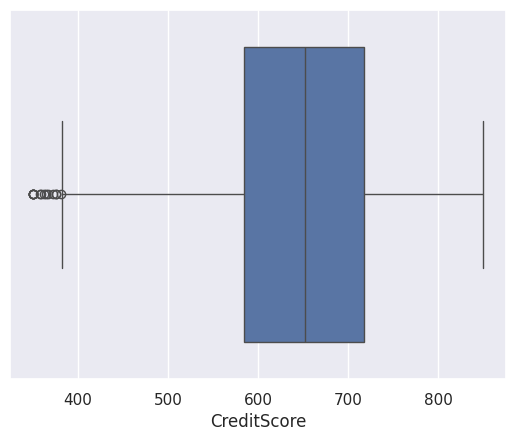

In [20]:
sns.boxplot(x=data['CreditScore'])

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: xlabel='Age'>

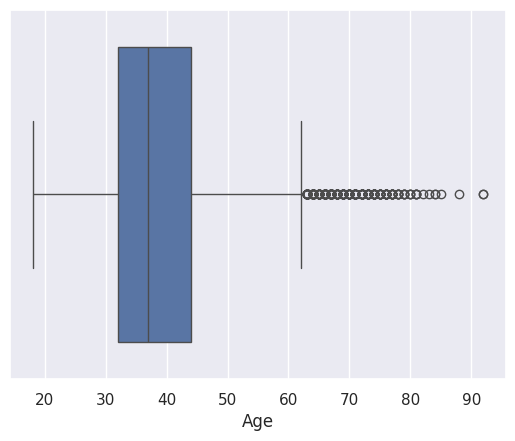

In [21]:
sns.boxplot(x=data['Age'])

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: xlabel='NumOfProducts'>

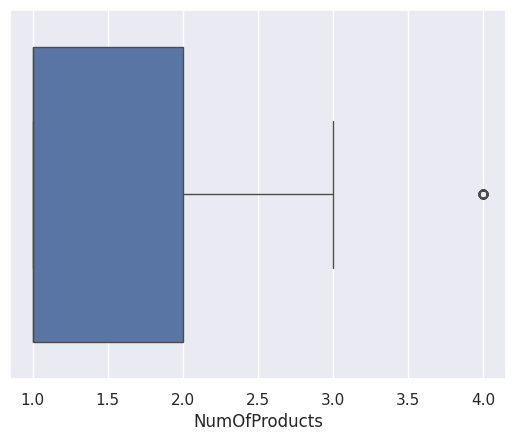

In [22]:
sns.boxplot(x=data['NumOfProducts'])

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: xlabel='EstimatedSalary'>

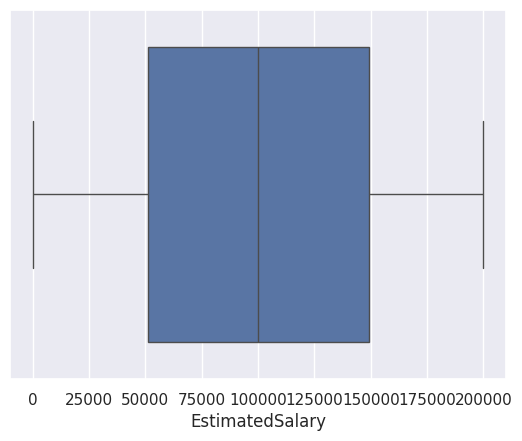

In [23]:
sns.boxplot(x=data['EstimatedSalary'])

# **CreditScore** --- Grupo 3

In [17]:
import statistics as stats



In [18]:
from scipy import stats


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


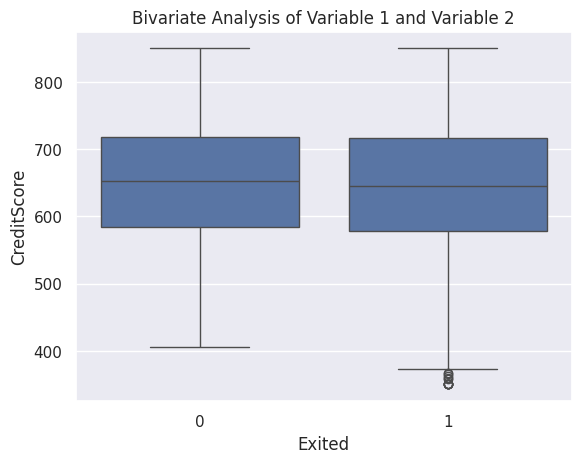

In [19]:
sns.boxplot(x='Exited', y='CreditScore', data=data) # boxplot, densidad
plt.title('Bivariate Analysis of Variable 1 and Variable 2')
plt.xlabel('Exited')
plt.ylabel('CreditScore')
plt.show()

# **Age** --- Grupo 3

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


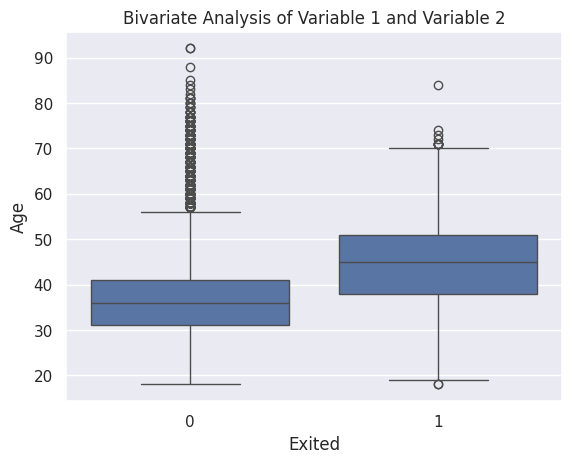

In [24]:
sns.boxplot(x='Exited', y='Age', data=data)
plt.title('Bivariate Analysis of Variable 1 and Variable 2')
plt.xlabel('Exited')
plt.ylabel('Age')
plt.show()

# **NumOfProducts** --- Grupo 3

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


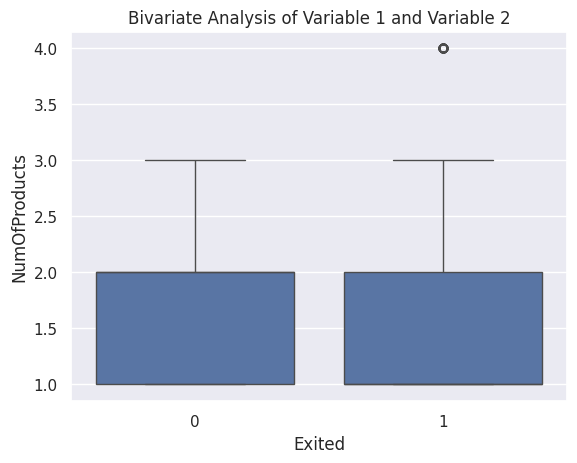

In [25]:
sns.boxplot(x='Exited', y='NumOfProducts', data=data)
plt.title('Bivariate Analysis of Variable 1 and Variable 2')
plt.xlabel('Exited')
plt.ylabel('NumOfProducts')
plt.show()

# **Estimated Salary** --- Grupo 3

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


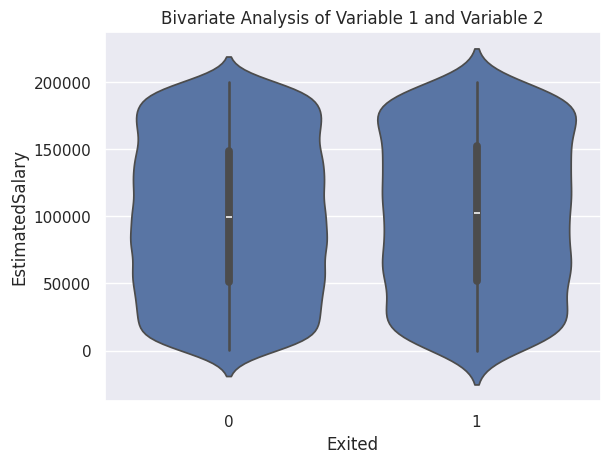

In [26]:
sns.violinplot(x='Exited', y='EstimatedSalary', data=data)
plt.title('Bivariate Analysis of Variable 1 and Variable 2')
plt.xlabel('Exited')
plt.ylabel('EstimatedSalary')
plt.show()

# **Matriz de Correlacion** --- Grupo 3

In [29]:
datanew = data.drop(['CustomerId', 'Surname', 'Geography', 'Gender', 'HasCrCard', 'IsActiveMember'], axis = 1)
datanew

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Exited
0,619,42,2,0.00,1,101348.88,1
1,608,41,1,83807.86,1,112542.58,0
2,502,42,8,159660.80,3,113931.57,1
3,699,39,1,0.00,2,93826.63,0
4,850,43,2,125510.82,1,79084.10,0
...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,96270.64,0
9996,516,35,10,57369.61,1,101699.77,0
9997,709,36,7,0.00,1,42085.58,1
9998,772,42,3,75075.31,2,92888.52,1


In [31]:
matriz_corr = datanew.corr()
print (matriz_corr)

                 CreditScore       Age    Tenure   Balance  NumOfProducts  \
CreditScore         1.000000 -0.003965  0.000842  0.006268       0.012238   
Age                -0.003965  1.000000 -0.009997  0.028308      -0.030680   
Tenure              0.000842 -0.009997  1.000000 -0.012254       0.013444   
Balance             0.006268  0.028308 -0.012254  1.000000      -0.304180   
NumOfProducts       0.012238 -0.030680  0.013444 -0.304180       1.000000   
EstimatedSalary    -0.001384 -0.007201  0.007784  0.012797       0.014204   
Exited             -0.027094  0.285323 -0.014001  0.118533      -0.047820   

                 EstimatedSalary    Exited  
CreditScore            -0.001384 -0.027094  
Age                    -0.007201  0.285323  
Tenure                  0.007784 -0.014001  
Balance                 0.012797  0.118533  
NumOfProducts           0.014204 -0.047820  
EstimatedSalary         1.000000  0.012097  
Exited                  0.012097  1.000000  


In [36]:
kendall_matriz_corr = datanew.corr(method='kendall')
print(kendall_matriz_corr)

                 CreditScore       Age    Tenure   Balance  NumOfProducts  \
CreditScore         1.000000 -0.005414  0.000791  0.004034       0.010118   
Age                -0.005414  1.000000 -0.007424  0.023611      -0.047761   
Tenure              0.000791 -0.007424  1.000000 -0.007016       0.010866   
Balance             0.004034  0.023611 -0.007016  1.000000      -0.266748   
NumOfProducts       0.010118 -0.047761  0.010866 -0.266748       1.000000   
EstimatedSalary     0.000807 -0.001571  0.005423  0.008200       0.010130   
Exited             -0.019049  0.268573 -0.011947  0.094983      -0.123434   

                 EstimatedSalary    Exited  
CreditScore             0.000807 -0.019049  
Age                    -0.001571  0.268573  
Tenure                  0.005423 -0.011947  
Balance                 0.008200  0.094983  
NumOfProducts           0.010130 -0.123434  
EstimatedSalary         1.000000  0.009864  
Exited                  0.009864  1.000000  


In [35]:
spearnman_matriz_corr = datanew.corr(method='spearman')
print(spearnman_matriz_corr)

                 CreditScore       Age    Tenure   Balance  NumOfProducts  \
CreditScore         1.000000 -0.007974  0.001133  0.005687       0.012568   
Age                -0.007974  1.000000 -0.010405  0.033304      -0.058566   
Tenure              0.001133 -0.010405  1.000000 -0.009513       0.012908   
Balance             0.005687  0.033304 -0.009513  1.000000      -0.316627   
NumOfProducts       0.012568 -0.058566  0.012908 -0.316627       1.000000   
EstimatedSalary     0.001237 -0.002431  0.007778  0.011778       0.012570   
Exited             -0.023289  0.323968 -0.013978  0.111110      -0.125282   

                 EstimatedSalary    Exited  
CreditScore             0.001237 -0.023289  
Age                    -0.002431  0.323968  
Tenure                  0.007778 -0.013978  
Balance                 0.011778  0.111110  
NumOfProducts           0.012570 -0.125282  
EstimatedSalary         1.000000  0.012081  
Exited                  0.012081  1.000000  


# **Seaborn Matriz** --- Grupo 3

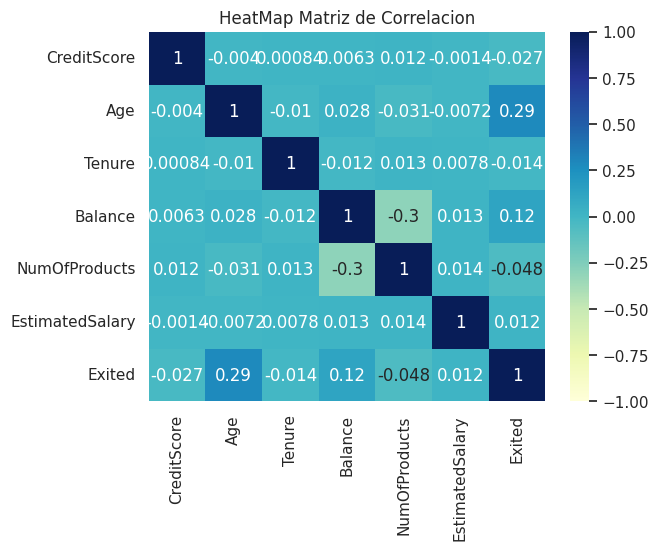

In [42]:
sns.heatmap(matriz_corr, annot=True, cmap='YlGnBu', vmax = 1, vmin = -1)
plt.title('HeatMap Matriz de Correlacion')
plt.show()

# **3 Variable Graph CreditScore vs HasCard vs Exited** --- Grupo 3

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future ve

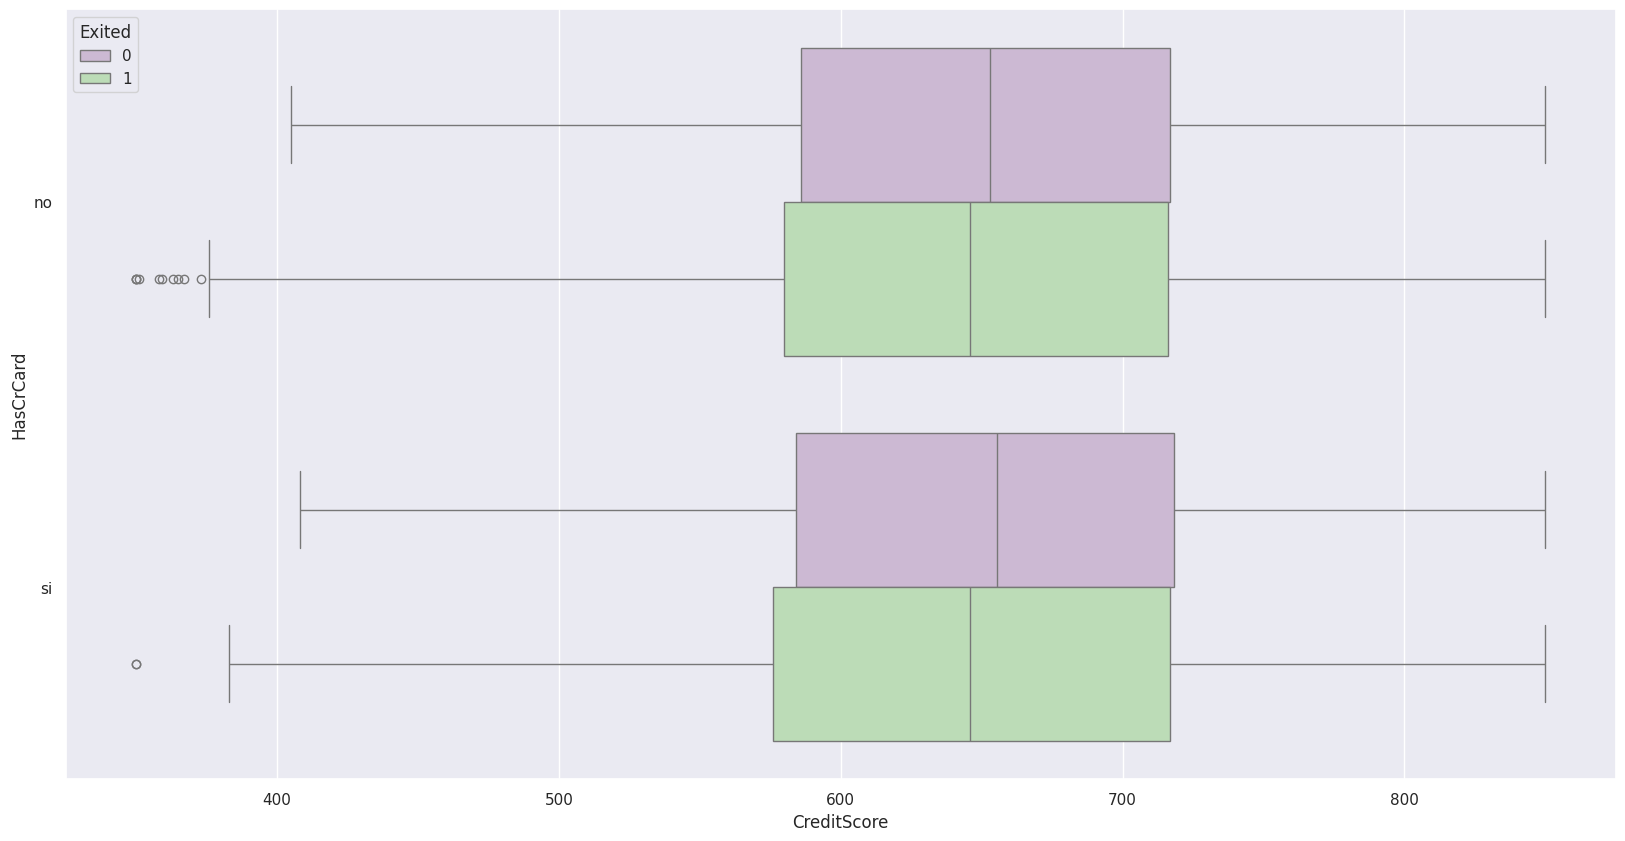

In [47]:
f,ax = plt.subplots(figsize =(20,10))
sns.boxplot(x="CreditScore" , y="HasCrCard", hue="Exited",data=data,palette="PRGn",ax=ax)
plt.show()